In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Joined

In [36]:
joined = pd.read_csv('joined.csv')

/tmp/ipykernel_41540/1891019688.py:1: DtypeWarning: Columns (28,29,30,49,51,54,55,56,57,59,60,61,62,63,65,66,67,71,72,73,74,75,76,78,79,80,81,82,83,84,85,87,88,89,91,92,93,94,96,98,99,100,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,162,163,164,166,167,168,169,170,171,172,173,174,175,176,177,179,180,182,183,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269) have mixed types. Specify dtype option on import or set low_memory=False.
  joined = pd.read_csv('joined.csv')


Text(0.5, 1.0, 'densidad de NAs por columna')

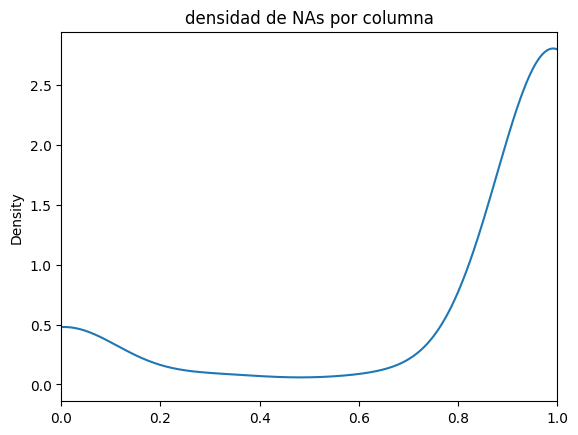

In [37]:
joined.isna().mean().plot.density()
plt.xlim(0, 1)
plt.title('densidad de NAs por columna')

In [38]:
joined.apply(lambda col: col.str.contains('control'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes        0.023563
jattr             0.021106
sample_name       0.003457
primary_search    0.000273
librarysource          0.0
                    ...   
Identifiers            NaN
Organism               NaN
Attributes             NaN
Accession              NaN
ID                     NaN
Length: 276, dtype: object

In [39]:
joined.sample_title_sam.unique()

array(['Internodes of soybean, sampling 1',
       'Internodes of soybean, sampling 2',
       'Internodes of soybean, sampling 3',
       'Roots of soybean, sampling 1', 'Roots of soybean, sampling 2',
       'Roots of soybean, sampling 3', 'Glycine max RNA-Seq', nan,
       'thinning_20160916_rep1', 'control_20160916_rep1',
       'thinning_20160916_rep2', 'control_20160916_rep2',
       'thinning_20160930_rep1', 'control_20160930_rep1',
       'thinning_20160930_rep2', 'control_20160930_rep2'], dtype=object)

In [40]:
joined.apply(lambda col: col.str.contains('drought'), axis=1).mean(skipna=False).sort_values(ascending=False)

attributes        0.004003
jattr             0.003912
sample_name       0.000364
primary_search    0.000273
librarysource          0.0
                    ...   
Identifiers            NaN
Organism               NaN
Attributes             NaN
Accession              NaN
ID                     NaN
Length: 276, dtype: object

In [41]:
joined['isolation_source_sam'].unique()

array([nan, 'missing', 'LN', 'HN', 'LNLP', 'not applicable',
       'not collected', 'field cultivation', 'plant',
       'Mixture of SMV strains SC1 and SC3', 'not provided', 'leaf',
       'drought', 'Well-watered', 'Palnt pathology, PDKV Akola'],
      dtype=object)

Quiero hacer esto para toda columna, con palabras clave

In [42]:
def cols_match(row, pat):
    row
    return row[row.astype(str).str.contains(pat, regex=False, case=False).fillna(False)].index.to_list()

In [43]:
kws = ['control', 'stress', 'drought', 'bacteria', 'inoculated', 'flood', 'deficit', 'infest', 'pathogen', 'acid', 'fungal']


In [44]:
stresses = pd.DataFrame(joined['biosample'])
for kw in kws:
    stresses[kw] = joined.apply(lambda row: cols_match(row, kw), axis=1)
stresses.to_csv('stresses.csv')

In [45]:
stresses_len = stresses.map(len)
stresses_len

,biosample,control,stress,drought,bacteria,inoculated,flood,deficit,infest,pathogen,acid,fungal
0,12,0,0,0,0,0,0,0,0,0,0,0
1,12,0,0,0,0,0,0,0,0,0,0,0
2,12,0,0,0,0,0,0,0,0,0,0,0
3,12,0,0,0,0,0,0,0,0,0,0,0
4,12,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10987,12,0,0,0,0,0,0,0,0,0,0,0
10988,12,0,0,0,0,0,0,0,0,0,0,0
10989,12,0,0,0,0,0,0,0,0,0,0,0
10990,12,0,0,0,0,0,0,0,0,0,0,0


In [46]:
stresses.where(stresses_len > 0)

,biosample,control,stress,drought,bacteria,inoculated,flood,deficit,infest,pathogen,acid,fungal
0,SAMD00025071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SAMD00025072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SAMD00025073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAMD00025074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SAMD00025075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10987,SAMN41829221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10988,SAMN41829222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10989,SAMN41829223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10990,SAMN41829224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
stresses_len.where(stresses_len == 0).isna().sum()

biosample     10992
control         441
stress          485
drought          84
bacteria          0
inoculated      339
flood             0
deficit         135
infest          141
pathogen          3
acid             79
fungal           12
dtype: int64

In [48]:
indicators = {}
kw = 'stress'
for i in stresses[stresses_len[kw] != 0].index:
    stresses.loc[i, kw] != []
    indicators[joined.loc[i, 'biosample']] = joined.loc[i, stresses.loc[i, kw]].to_dict()

In [49]:
json.dumps(indicators)

'{"SAMD00222772": {"title": "potato tubers cold stress substracted cDNA library"}, "SAMN03755595": {"title": "ZT20-4h_Stress-R1"}, "SAMN03755596": {"title": "ZT20-4h_Stress-R2"}, "SAMN03755597": {"title": "ZT20-4h_Stress-R3"}, "SAMN03755601": {"title": "ZT0-8h_Stress-R1"}, "SAMN03755602": {"title": "ZT0-8h_Stress-R2"}, "SAMN03755603": {"title": "ZT0-8h_Stress-R3"}, "SAMN03755607": {"title": "ZT4-12h_Stress-R1"}, "SAMN03755608": {"title": "ZT4-12h_Stress-R2"}, "SAMN03755609": {"title": "ZT4-12h_Stress-R3"}, "SAMN03755613": {"title": "ZT8-16h_Stress-R1"}, "SAMN03755614": {"title": "ZT8-16h_Stress-R2"}, "SAMN03755615": {"title": "ZT8-16h_Stress-R3"}, "SAMN03755619": {"title": "ZT12-20h_Stress-R1"}, "SAMN03755620": {"title": "ZT12-20h_Stress-R2"}, "SAMN03755621": {"title": "ZT12-20h_Stress-R3"}, "SAMN03755625": {"title": "ZT16-24h_Stressl-R1"}, "SAMN03755626": {"title": "ZT16-24h_Stressl-R2"}, "SAMN03755627": {"title": "ZT16-24h_Stressl-R3"}, "SAMN03761650": {"attributes": "[{k=geo_accessi

In [50]:
stresses_len.iloc[joined[joined['bioproject'] == 'PRJNA197379'].index].where(stresses_len==0).isna().sum()

biosample     30
control        0
stress         0
drought        0
bacteria       0
inoculated     0
flood          0
deficit        0
infest         0
pathogen       0
acid           0
fungal         0
dtype: int64

# Maxi

In [51]:
stress_maxi = pd.read_csv('stress_control_maxi.csv')
stress_maxi

,Control/Treated,BioSample
0,con,SAMN31521702
1,con,SAMN31521701
2,con,SAMN31521700
3,con,SAMN31521699
4,con,SAMN31521748
...,...,...
12851,NaN,SAMN41088855
12852,NaN,SAMN41088854
12853,NaN,SAMN41088853
12854,NaN,SAMN41088852
